In this small project I decided to analyze the dataset of films released between 1980 and 2020 compiled by **Daniel Grijalva**.
Dataset was downloaded from: https://www.kaggle.com/danielgrijalvas/movies *(last access: 19.08.2021)*

### №1. Setting up the project.

I'll do some data manipulations, so I'll need pandas and numpy and I also prefer to visualize certain data, for a clearer understanding

The parameters of dataframe display are not required, but I personally feel more comfortable working with a table where I can see all the data, although it slows down the output 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', None)

### №2. Reading and exploring the data

In [3]:
odf = pd.read_csv('movies.csv') # odf - original data frame

In [4]:
odf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# looking at unique values in the "rating" column
odf['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [6]:
# same with genre
odf['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [7]:
## let's look at countries in "release"

country = odf['released'].str.extract('.*\s\((.*)\)')
country[0].unique()

array(['United States', 'Australia', 'Japan', 'Ireland', 'Argentina',
       'Soviet Union', 'United Kingdom', 'Sweden', 'France', 'Canada',
       'Brazil', 'South Korea', 'West Germany', 'Italy', 'Denmark',
       'Netherlands', 'Uruguay', 'Hong Kong', 'Taiwan', 'Yugoslavia',
       'Spain', 'Finland', 'South Africa', 'Philippines', 'Portugal',
       'Mexico', 'Germany', 'New Zealand', 'Iran', 'Greece', 'Singapore',
       'Poland', 'India', 'Federal Republic of Yugoslavia', 'Iceland',
       'Belgium', 'Israel', 'Hungary', 'China', 'Russia', 'Norway',
       'Austria', 'Thailand', 'Puerto Rico', 'Turkey', 'Romania',
       'Czech Republic', 'Latvia', 'Indonesia', 'Bahrain', 'Kazakhstan',
       nan, 'Malaysia', 'Croatia', 'Bulgaria', 'Lebanon',
       'United Arab Emirates', 'Ukraine', 'Bahamas', 'Kuwait', 'Vietnam',
       'Cameroon'], dtype=object)

So, we have:
1. movie name
2. rating (MPAA and TV Parental Guidelines rating systems)
3. genre
4. year (looks like its a year of release)
5. date of release in the specified country
6. score
7. number of votes (means the number of people who left a review of the movie)
8. director 
9. writer (one for each movie)
10. movie star (one for each movie)
11. country (one for each movie)
12. budget of production (in USD - simply googled for a check)
13. gross revenue (in USD - same)
14. company (one for each movie)
15. runtime (in minutes)

#### Data criticism

Columns "name" and "runtime" shouldn't have any effect on the score of the film or, if they do, it just makes no sense.

Columns "year" and "release" sometimes have different years for one movie. Let's take **"Superman II"**, for instance. It has **1980** in the "year" column and **June 19, 1981 (United States)** in the "release" column. Based on the wikipedia page (https://en.wikipedia.org/wiki/Superman_II) it was firstly released on December 4, **1980** (in Australia and mainland Europe). 
So, it seems that the "year" column shows the year of the first release (wherever location is). The "release" column has country-specific release date not always in the U.S., as I'll show later, and therefore ***it makes no sense to use the "released" in this project***. 
Despite the fact that from the point of view of adequacy the year of release cannot influence its score it is quite possible that there is a *relationship between the year of release and the number of votes* (the assumption is that newer films get more votes)

Moving next, the number of votes for different movies is taken from a specific resource - **"IMDb"**, which obviously does not cover the entire audience of those who voted and it's much less watched the movie. However, the values are unified, as they represent IMDb users only, so the use of this data for our purposes is acceptable with the caveat of limitations I've mentioned

Finally, the "writer", "star", "country" and "company" columns contain one value for each movie. However, there are many cases where a movie has **more than one** writer, where the movie was shot in **several** countries, by **several** companies, and with **more than one** lead or star actor. Even the director may have changed during filming, but in this case it is possible to consider that the final director who completed the film is indicated. Thus, it is fair to dispense with the "writer", "star", "country", and "company" columns mentioned above as well.

**Note** that movies usually fall into several genres, but in any film there is always *a clear bias towards a particular genre*, so the use of this column is appropriate.


Based on the critical analysis above, let's create another df without irrelevant columns.

### №3. Data cleaning

In [8]:
cdf = odf[['score', 'votes', 'budget', 'gross', 'rating', 'genre', 'director', 'year']] # cleaned data frame

In [9]:
# data types of dataframe columns
cdf.dtypes

score       float64
votes       float64
budget      float64
gross       float64
rating       object
genre        object
director     object
year          int64
dtype: object

At this point we have 4 columns with qualitative data: "rating", "genre", "director", "year"

For the **"rating"** column with *categorial* data we can make an additional column where we put the id set for each unique value. The more severe the constraints, the greater the id value:
- G, Approved - **1**
- PG and TV-PG - **2**
- PG-13 and TV-14 - **3**
- R - **4**
- NC-17, X and TV-MA - **5**
- Values 'Not Rated' and 'Unrated' will be **excluded** from analysis
  
**Genre** and **director** are *nominal* attributes

**Year** of release is an *ordinal* attribute (higher value - newer movie)

So, we have different types of attributes in our dataset, therefore we need to use several methods to analyse the data
- Basic **corr()** with "Spearman" method, as we have an ordinal variable 
- **Cramer's V** for investigating correlations with categorial data
- **Cross-tabulation** to look at frequency distribution for nominal values

In [10]:
#looking for NULL values
for col in cdf.columns:
    pct_missing = round(np.mean(cdf[col].isnull()) * 100, 2)
    cnt_missing = cdf[col].isnull().sum()
    print('NULL values in {} - {}% or {} items'.format(col,pct_missing, cnt_missing))

NULL values in score - 0.04% or 3 items
NULL values in votes - 0.04% or 3 items
NULL values in budget - 28.31% or 2171 items
NULL values in gross - 2.46% or 189 items
NULL values in rating - 1.0% or 77 items
NULL values in genre - 0.0% or 0 items
NULL values in director - 0.0% or 0 items
NULL values in year - 0.0% or 0 items


#### OK, there are some NULL values in almost each column. 

NULL values are in almost all columns, but most of them in the "budget" column *(28%)*, and also not a few in the "gross" *(2.5%)* and "rating" *(1%)* columns.

Anyway the **corr()** method excludes NULL values for each column. So let's look at coefficients

### №4. Correlations

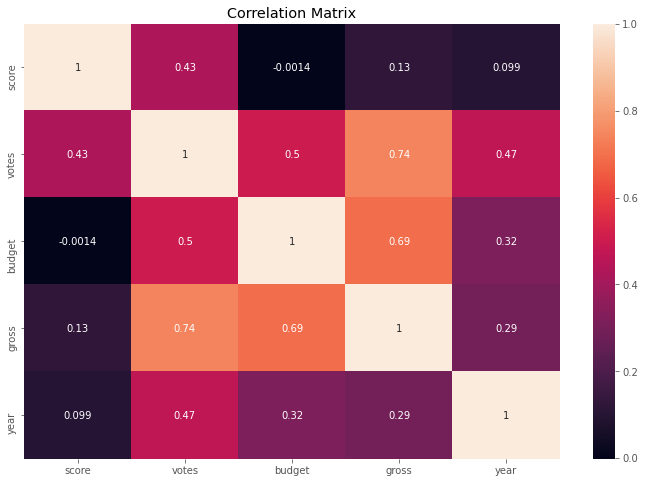

In [11]:
correlation_matrix = cdf[['score', 'votes', 'budget', 'gross', 'year']].corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

#### Conclusions based on correlation matrix ("score","votes","budget","gross", "year")
As we can see the strong correlation is between two pairs **gross - votes** and **gross - budget**

The number of voters is related (though not directly) to the number of people who have seen the movie (and this is directly connected to gross revenue). Hence the logical conclusion that *the more voting people, the more gross revenue and vice versa*.

In the case of the budget and gross revenue pairing, it is logical to expect that by investing more money in production, the film receives more revenue. However, as the NULL values statistics showed, the dataset is missing almost *one-third* of the movies budget data. So, it should be concluded that *the correlation, although present, may have a different meaning when filling in the missing values*.

The correlation coefficients between the pairs **votes - score**, **budget - votes** and **year - votes** do not show a strong relationship, but it is present here. Another thing is that the first two pairs make no sense, because the amount spent on producing the movie has nothing to do with the audience's votes, and *the number of votes does not determine the success of the film* (since we do not know how many votes are positive and how many are negative). Speaking of the **year - votes** pair my assumption about the relationship between the year of release of the film and the number of reviews came true, but it's not so strong as I thought it would be. Later we will build a regression plot for a better visualization.

Next, we have two pairs with low positive correlation: **year - budget** and **year - gross**. Although we would expect to see a more strong connection here, as movie industry grows financially and involves more and more people every year. Anyway, it should be visualized for a clearer understanding.

Finally, it's not a surprice that there is almost no correlation between **budget of the movie and score**, because we've seen a lot of cases when high budget movies were not liked by the audience. However, I've expected to see a much higher correlation coefficient between **gross revenue and score**. It seems that *the commercial success of a film and its ratings do not always go together*.


### №5. Visualizations of correlation pairs

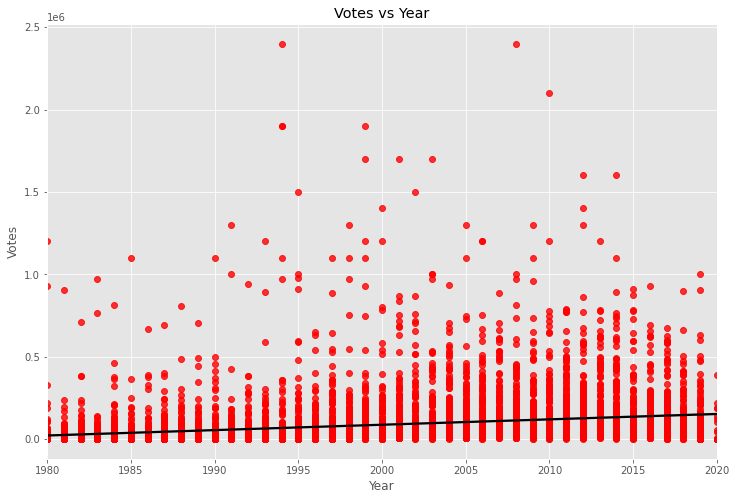

In [12]:
sns.regplot(data = cdf, x='year', y='votes', scatter_kws = {'color': 'red'}, line_kws={'color':'black'})

plt.title('Votes vs Year')
plt.xlabel('Year')
plt.ylabel('Votes')

plt.show()

Well, we see a slight growth over the period, but still not enough to talk about a clear increase in votes every year.

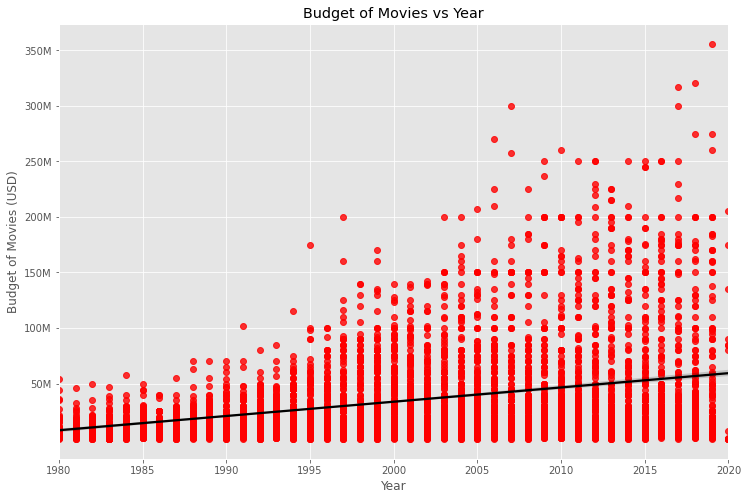

In [13]:
sns.regplot(data = cdf, x='year', y='budget', scatter_kws = {'color': 'red'}, line_kws={'color':'black'})

yticks = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]
plt.yticks(ticks = [i * 100000000 for i in yticks], labels = [str(int(i * 100)) + 'M' for i in yticks])

plt.title('Budget of Movies vs Year')
plt.xlabel('Year')
plt.ylabel('Budget of Movies (USD)')

plt.show()

Again, we don't see budgets skyrocketing every year. However, what if we look at the maximum budgets of movie budgets for each year? 

Let's build a graph, which will show us more clearly these dynamics

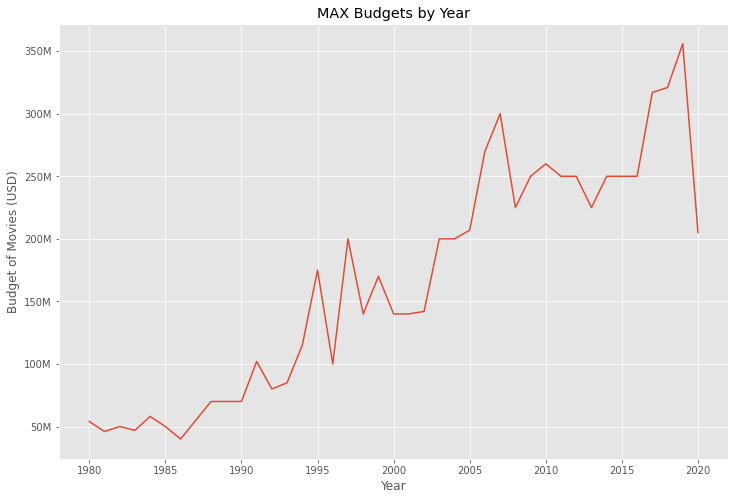

In [14]:
max_budgets = cdf.groupby('year')['budget'].max()
yticks = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]

plt.plot(max_budgets)

plt.yticks(ticks = [i * 100000000 for i in yticks], labels = [str(int(i * 100)) + 'M' for i in yticks])
plt.title('MAX Budgets by Year')
plt.xlabel('Year')
plt.ylabel('Budget of Movies (USD)')

Thus, we see that the maximum budgets of films are mostly growing (with the exception of certain satellites), and very rapidly. 

Let's move to the **"gross" - "year"** pair

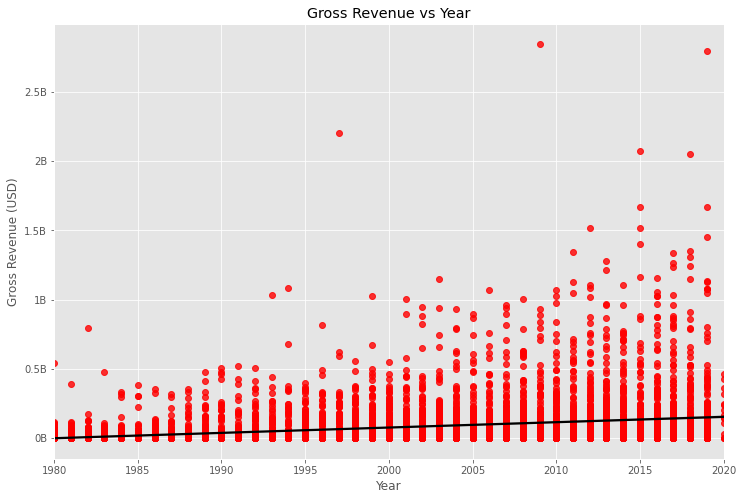

In [15]:
sns.regplot(data = cdf, x='year', y='gross', scatter_kws = {'color': 'red'}, line_kws={'color':'black'})

yticks = [0, 0.5, 1, 1.5, 2, 2.5]

plt.yticks(ticks = [i * 1000000000 for i in yticks], labels = [str(i) + 'B' for i in yticks])

plt.title('Gross Revenue vs Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (USD)')

plt.show()

Here we see almost the same situation as in the previous case, except for the maximum values. They do not show the same growth over the years and there is no point in visualizing them.

Now let's build a regression plot with scores and gross earnings 

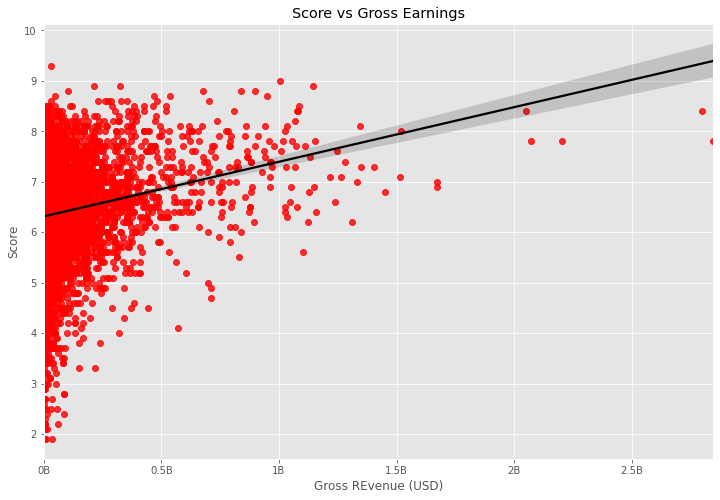

In [16]:
sns.regplot(data = cdf, x='gross', y='score', scatter_kws = {'color': 'red'}, line_kws={'color':'black'})

xticks = [0, 0.5, 1, 1.5, 2, 2.5]

plt.xticks(ticks = [i * 1000000000 for i in xticks], labels = [str(i) + 'B' for i in xticks])
plt.title('Score vs Gross Earnings')
plt.xlabel('Gross REvenue (USD)')
plt.ylabel('Score')

plt.show()

Here we can see a positive regression between **"score"** and **"gross"**. We see a strong concentration of movies with gross revenue up to 500M USD, with a large spread of estimates. However, further down, we see *that the number of low scores sharply decreases as the movie's revenue figure increases*



As the film industry develops, there are more and more opportunities to create a truly impressive movie. Let's see if there is a correlation between a film's score and the year of its release. To do this, let's build the same regplot

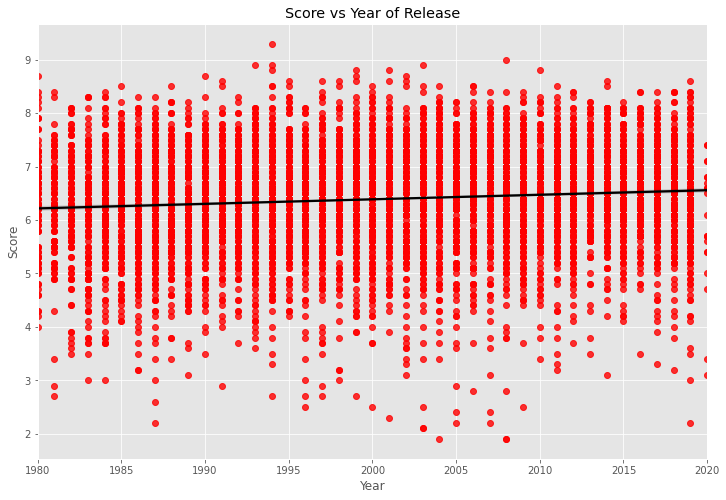

In [17]:
sns.regplot(data = cdf, x='year', y='score', scatter_kws = {'color': 'red'}, line_kws={'color':'black'})

plt.title('Score vs Year of Release')
plt.xlabel('Year')
plt.ylabel('Score')

plt.show()

Well, that's what I expected to see. Time has almost **nothing to do** with movie quality. Every year in theaters are released as masterpieces, and completely failed movies

### №6. Cramer's V for looking at correlations with categorial variables

Here we'll prepare the data to search for correlations using Cramer's V and use a function I've found on the Internet posted on **"Towards Data Science"** by *Shaked Zychlinski* (https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

In [18]:
# encoding data from the 'rating' column
cdf['rating_ranked'] = cdf['rating'].replace({'Not Rated': np.nan, 'Unrated' : np.nan,
                                              'G' : 1, 'Approved' : 1,
                                              'PG' : 2, 'TV-PG' : 2,
                                              'PG-13' : 3, 'TV-14' : 3,
                                              'R' : 4,
                                              'NC-17' : 5, 'X' : 5, 'TV-MA' : 5})

<ipython-input-18-9c999e62b8c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['rating_ranked'] = cdf['rating'].replace({'Not Rated': np.nan, 'Unrated' : np.nan,


In [19]:
# Cramer's V correlation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [20]:
# looking at the correlations
columns = ['score', 'votes', 'budget', 'gross', 'year']
num_data = cdf[columns]
cramers_results= []
col = []
for y in num_data :
    cramers =cramers_v(cdf['rating_ranked'], num_data[y])
    cramers_results.append(round(cramers,2)) 
 
for i in range(len(cramers_results)):
    print('Correlation between column "rating" and "{}" is: {}'.format(columns[i], cramers_results[i]))

Correlation between column "rating" and "score" is: 0.05
Correlation between column "rating" and "votes" is: 0.0
Correlation between column "rating" and "budget" is: 0.13
Correlation between column "rating" and "gross" is: 0.02
Correlation between column "rating" and "year" is: 0.14


It was expected, but it was worth a try, maybe we would have found some connection between the rating and the year (for example, knowing that every year more and more films are made with an NC-17, X or TV-MA rating)

### №7. Analyzing relationships with score and nominal variables

#### 1. Genres - Score

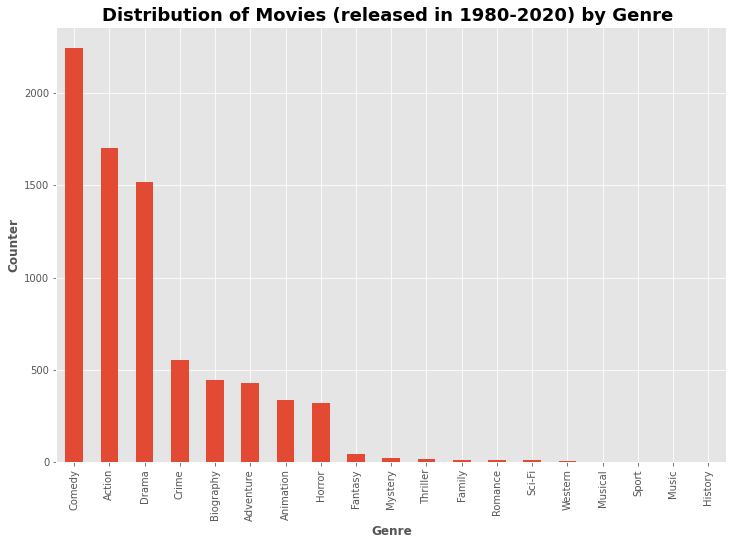

In [21]:
genres_hist = cdf.groupby('genre').size().sort_values(ascending = False)

ax = genres_hist.plot.bar()
ax.set_title('Distribution of Movies (released in 1980-2020) by Genre ', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Counter', fontweight='bold')

Again, we should take into account that the dataset represents the **main** genre of each movie. Of course, there are **many more** movies in Fantasy, Thriller, Sci-Fi, etc., but unfortunately, such categories are placed in the background (this is how movie industry works), so it is most likely that *the films that come to mind belong to more popular genres in this dataset*.

Let's take *"Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama" and "Horror"* genres only, while others are not representative as we may see.

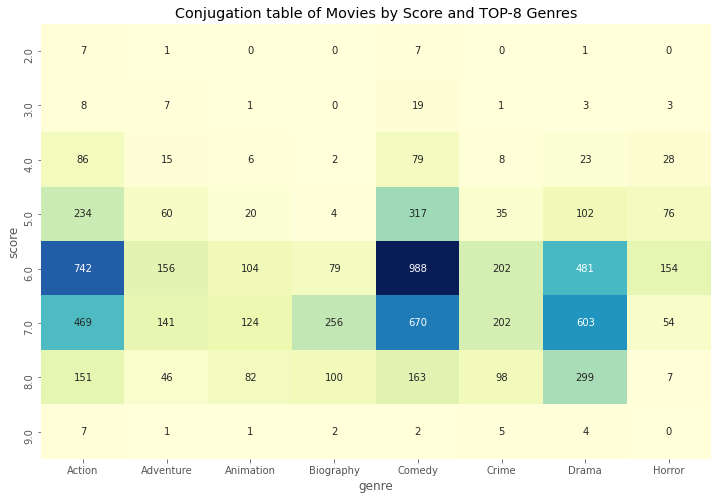

In [22]:
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Horror"]
df_top_genres = cdf[cdf['genre'].isin(genres)].copy()
df_top_genres['score'] = round(df_top_genres['score'], 0)

sns.heatmap(pd.crosstab(df_top_genres['score'], df_top_genres['genre']),
            cmap="YlGnBu", 
            annot=True, 
            cbar=False,
            fmt='g')
plt.title('Conjugation table of Movies by Score and TOP-8 Genres')

#### Based on the conjugation table, we can draw several conclusions.

1) Action and Comedy genre movies have the most frequent score (rounded to whole numbers) of **6** (988 for Comedy and 742 for Action) and almost a third less frequent of **7** (670 and 469, respectively), The situation with the Drama genre is **the opposite**. Drama movies are twice as likely to receive an **8** (299 vs. 163 for Comedy and 151 for Action), which indicates ***the greater chances of films of this genre to receive high ratings***.

2) Among the other genres, which are less widely represented in the table, ***the ratings are mostly positive*** (**6-8**), although it is worth noting that the distribution of scores in the Horror genre is somewhat different. Here we see the most common rating of 6 (154 movies), followed by **5** (79), and only then by **7** (54). There are also a relatively large number of films with a score of **4** (28). So, ***the Horror movies are far from always satisfying the audience***.

#### 2. Directors - Score

In [23]:
# firslty, let's look how many directors present in the dataset
len(cdf['director'].unique())

2949

Well, it's too much to draw a bar plot, so, we'll take a look at top-10 directors (by the number of movies made) 

In [24]:
directors_all = (cdf
                 .groupby('director')
                 .size()
                 .sort_values(ascending = False)
                 .reset_index()
                 .rename(columns = {0: 'counter'})) # just to make it more readable
directors_all.head(10)

,director,counter
0,Woody Allen,38
1,Clint Eastwood,31
2,Directors,28
3,Steven Spielberg,27
4,Ron Howard,24
5,Ridley Scott,23
6,Steven Soderbergh,23
7,Joel Schumacher,22
8,Barry Levinson,20
9,Martin Scorsese,19


As you can see, **"Directors"** was included in the list, which apparently refers to the collective work on the film. However, it is likely that they are different, and we do not know who they consist of, so it would be more logical **to exclude this value**.
Let's also include directors who have made **at least 20** movies (*Sorry, Martin Scorsese*)

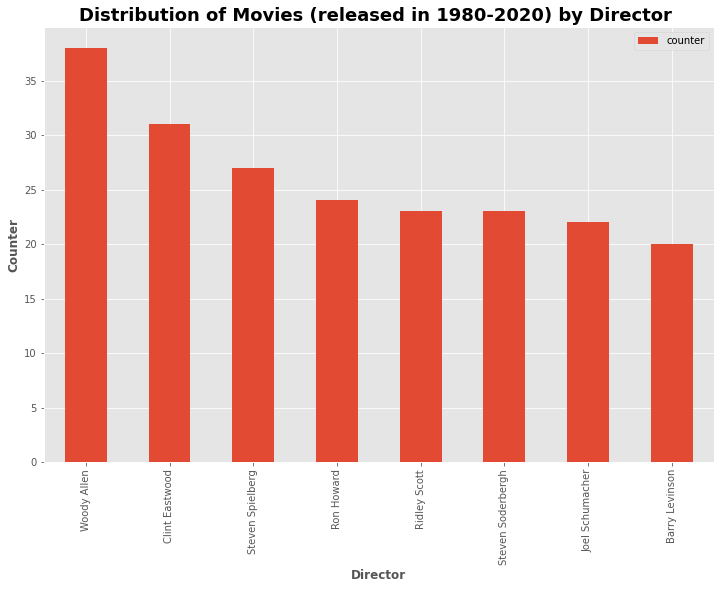

In [25]:
# Preparing data for cross-tab and visualizing it with bar plot
directors_top = directors_all[(directors_all['counter'] >= 20) & (directors_all['director'] != 'Directors')]
directors_hist = directors_top

ax = directors_hist.plot.bar()

ax.set_xticklabels(directors_top['director'])

ax.set_title('Distribution of Movies (released in 1980-2020) by Director ', fontsize=18, fontweight='bold')
plt.xlabel('Director', fontweight='bold')
plt.ylabel('Counter', fontweight='bold')

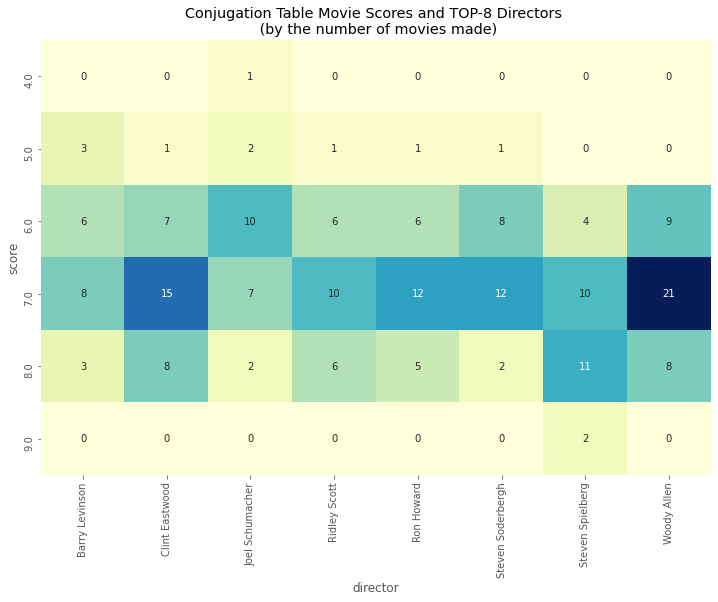

In [26]:
df_top_directors = cdf[cdf['director'].isin(directors_top['director'])].copy()
df_top_directors['score'] = round(df_top_directors['score'], 0)

sns.heatmap(pd.crosstab(df_top_directors['score'], df_top_directors['director']),
            cmap="YlGnBu", 
            annot=True, 
            cbar=False,
            fmt='g')
plt.title('Conjugation Table Movie Scores and TOP-8 Directors \n (by the number of movies made)')

#### Let's draw some conclusions

Based on the data from the table, we can see that the bulk of the films produced by the filmmakers represented receives **mostly positive ratings**. That is, quantity is not always the opposite of quality!

*Steven Spielberg* more frequently gets highest ratingd, but as a rule his films are rated by viewers at **7-8**. 

*Woody Allen* and *Clint Eastwood* (who have the largest number of films made) usually get a **7**.

### Brief Summary

In this project, we looked in detail at a dataset that stores information about movie films released over the past 40 years. The **data has been critiqued**, based on which **the data has been cleaned up**. Next, we **analyzed the relationships of various attributes**, including categorical and ordinal attributes. Finally, **contingency tables showing the frequency distribution** of the pairs "Genre - Score", "Director - Score" were constructed.

Much more could be done, here my goal was to demonstrate a critical approach to the data, as well as several statistical methods that can be applied in the analysis of such data.